C:\Users\ASUS\AppData\Local\Temp\ipykernel_3648\2364318698.py:9: UserWarning: Parsing '16/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3648\2364318698.py:9: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3648\2364318698.py:9: UserWarning: Parsing '24/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3648\2364318698.py:9: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["invoice_date"] = pd.to_datet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


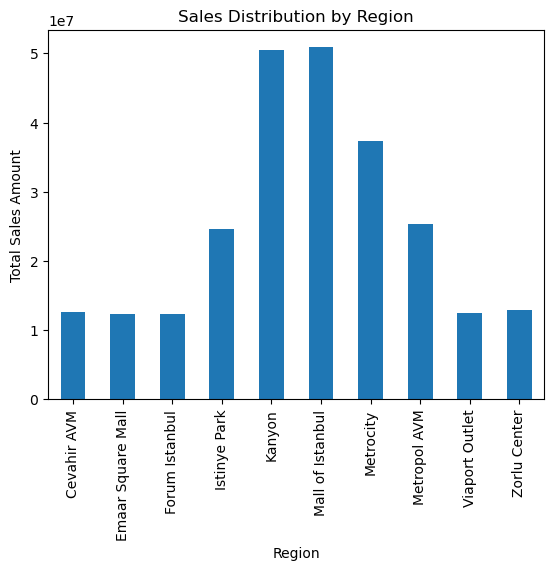

The top-performing region is: Mall of Istanbul


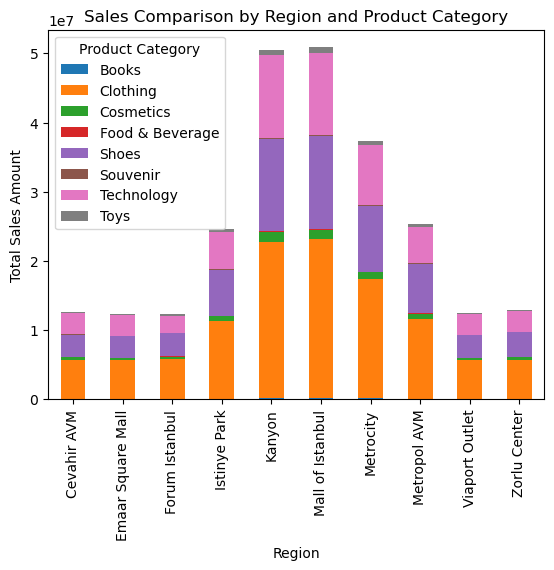

Text(0, 0.5, 'Sales')

<Figure size 1000x1000 with 0 Axes>

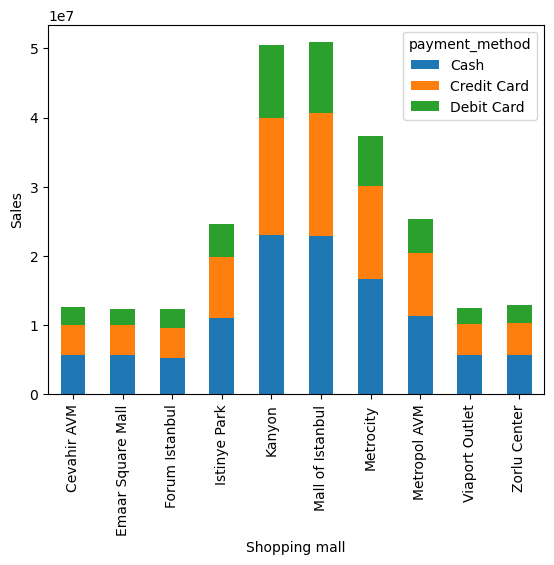

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("retail_sales_data.csv")

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df.head()

df.describe()

df.info()

df.isna().sum()

df.isnull().sum()


df['Sales'] = df['quantity']*df['price']
df.head()


# Group data by region and calculate total sales amount
region_sales = df.groupby("shopping_mall")["Sales"].sum()
region_sales.plot(kind="bar")
# region_sales.plot()
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()

region_sales

print(f"The top-performing region is: {region_sales.idxmax()}")

#Stacked bar plot to compare sales amounts across regions and categories

region_category_sales = df.groupby(["shopping_mall", "category"])["Sales"].sum().unstack()

region_category_sales.plot(kind="bar", stacked=True)
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category")
plt.show()


temp = df.groupby(["shopping_mall", "payment_method"])["Sales"].sum().unstack()
plt.figure(figsize=(10,10))
temp.plot(kind='bar', stacked=True)
plt.xlabel("Shopping mall")
plt.ylabel("Sales")
